### US Visa Prediction Project
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

### Problem Statement

### Data Collection

In [1]:
import pandas as pd   
import numpy as np  
import seaborn as sns  
import plotly.express as px  
import matplotlib.pyplot as plt 

In [2]:
import os 

In [3]:
pwd

'c:\\Users\\hp\\OneDrive\\Documents\\Project\\notebooks'

In [4]:
os.chdir("../")

In [5]:
pwd

'c:\\Users\\hp\\OneDrive\\Documents\\Project'

In [6]:
import zipfile
from pathlib import Path   

def unzip_and_create(zip_file_path: str, destination_name: Path):
    """
    Unzips a file into a subdirectory within the 'data' directory, creating it if needed.

    Args:
        zip_file_path (str): The full path to the zip file.
        destination_name (Path): The name of the folder to extract into, relative to 'data/'.
    """
    root_directory = Path("data")
    full_destination_path = root_directory / destination_name

    # This one line handles both creating the directory and ignoring if it already exists.
    # This removes the need for the original if/else block.
    full_destination_path.mkdir(parents=True, exist_ok=True)

    with zipfile.ZipFile(zip_file_path, "r") as f:
        f.extractall(full_destination_path)
    file_name = Path(zip_file_path).name
    print(f"The file '{file_name}' has been unzipped to '{full_destination_path}'")
unzip_and_create(
    r"C:\Users\user\Documents\mlops_production_ready_pipelines\data\hotel_booking.csv.zip",
    Path("hotel-bookings")
)

In [7]:
pwd

'c:\\Users\\hp\\OneDrive\\Documents\\Project'

In [8]:
df = pd.read_csv(r'C:\Users\hp\OneDrive\Documents\Project\data\raw\hotel_booking.csv')
print(df.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  customer_type  \
0                        0                     0       2  ...      Transient   
1   

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
print(df.shape)

(119390, 36)


In [11]:
print(df.isna().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
print(df.isna().sum()[df.isna().sum() > 0])

children         4
country        488
agent        16340
company     112593
dtype: int64


In [13]:
print((df.isna().sum()[df.isna().sum() > 0] / len(df)) * 100)

children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64


In [14]:
print(df['company'].nunique())

352


import umap
sns.set(style="whitegrid", palette="muted", font_scale=1.0)
plt.rcParams["figure.figsize"] = (10, 6)

<Axes: >

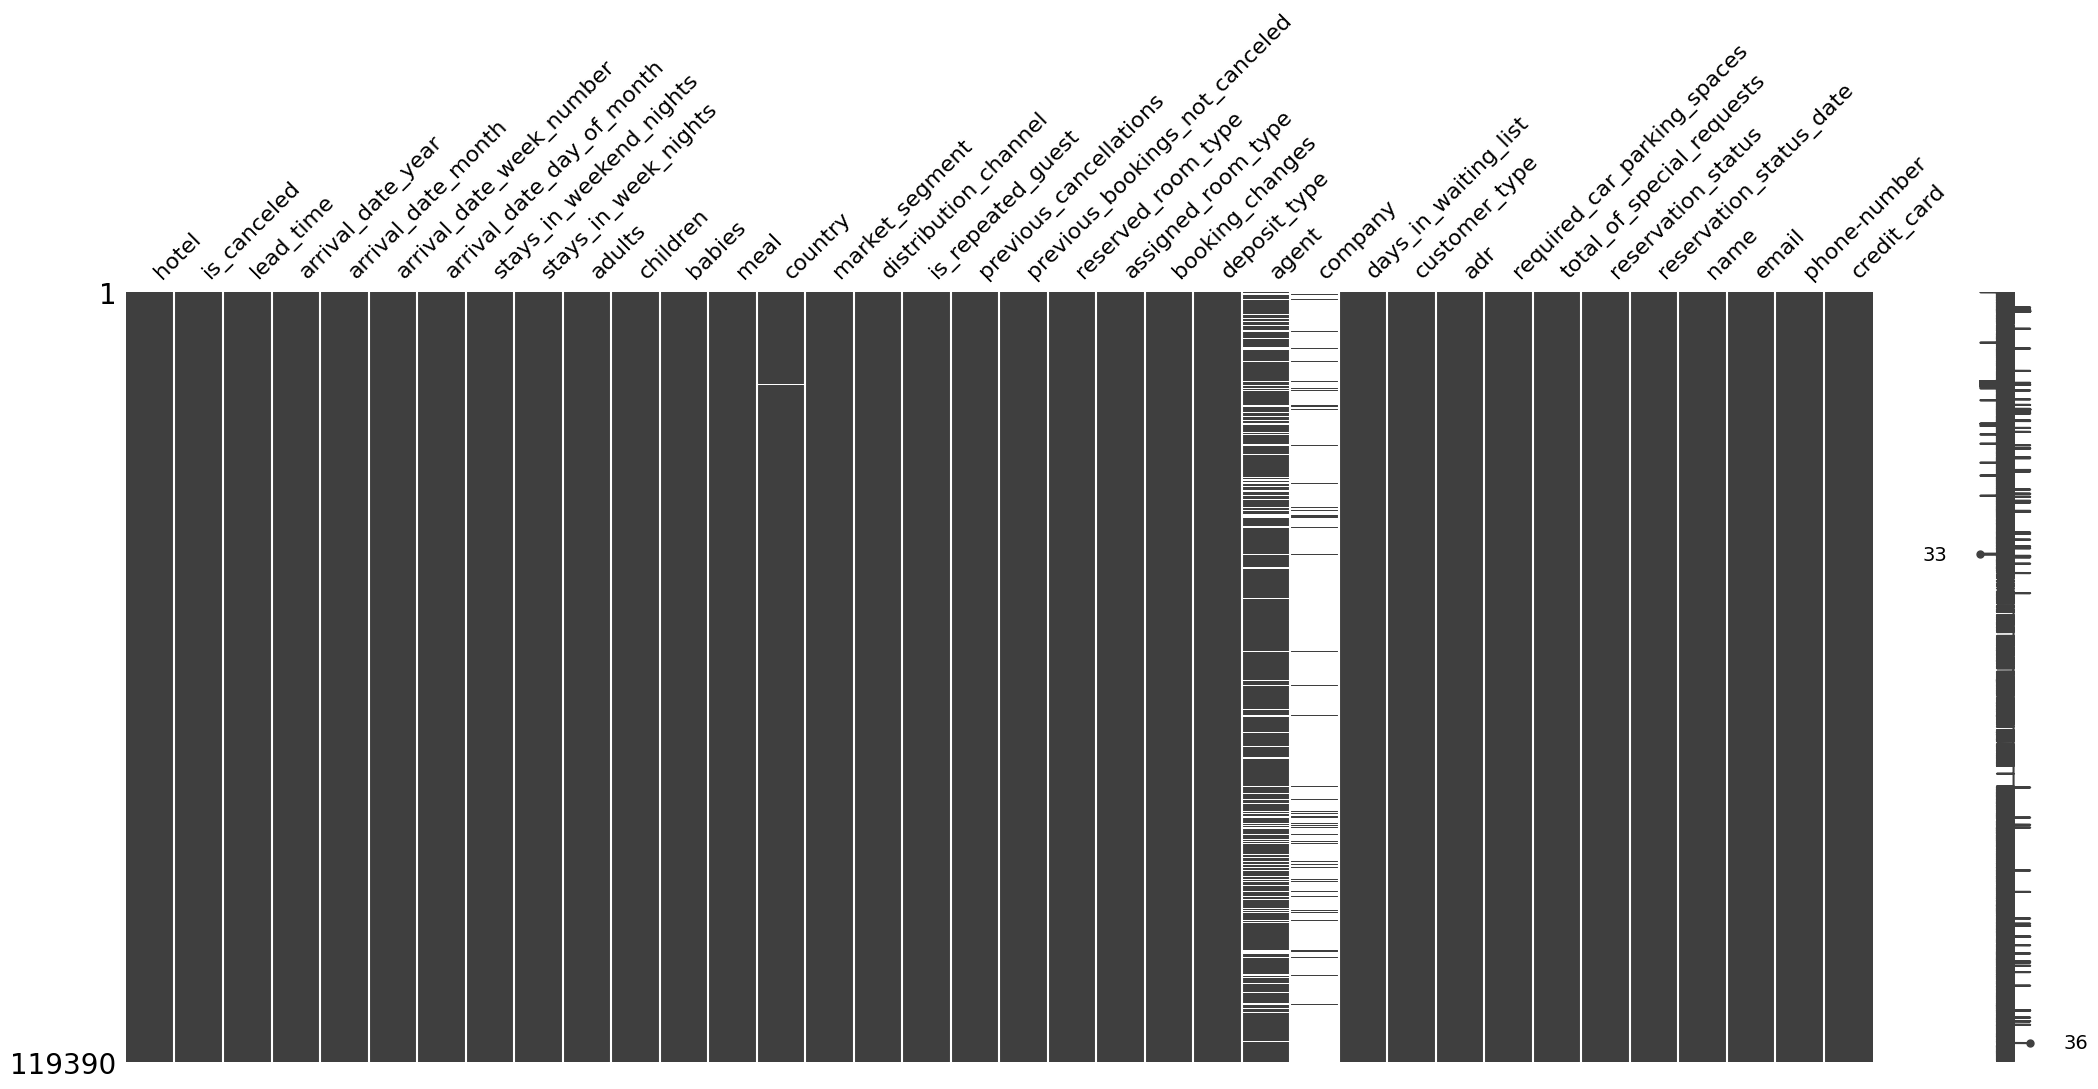

In [15]:
## Comapny has high missingness

import missingno as msno  
msno.matrix(df)

In [16]:
## I will dropping company
## I will be taken care of the other missing columns

In [17]:
df['country'].value_counts()

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
MRT        1
KIR        1
SDN        1
ATF        1
SLE        1
Name: count, Length: 177, dtype: int64

In [18]:
print(df['country'].nunique())

177


In [19]:
## Due to high cardinality, I will be dropping country

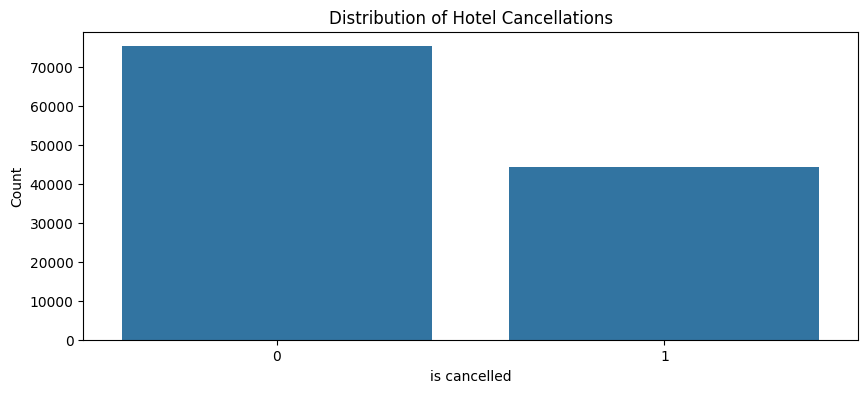

In [20]:
# Visualize the distribution of target variable
plt.figure(figsize=(10, 4))
sns.countplot(x='is_canceled', data=df)  
plt.title('Distribution of Hotel Cancellations')
plt.xlabel('is cancelled')
plt.ylabel('Count')
plt.show()

In [21]:
print(df['is_canceled'].value_counts(
    normalize=True).reset_index()['is_canceled'].map({0: "Not cancelled", 1: "Canceled"}))

0    Not cancelled
1         Canceled
Name: is_canceled, dtype: object


In [22]:
distribution = df['is_canceled'].value_counts(
    normalize=True).reset_index()

distribution['is_canceled'] = distribution['is_canceled'].map({0: "No", 1: "Yes"})

In [23]:
distribution

,is_canceled,proportion
0,No,0.629584
1,Yes,0.370416


In [24]:
df.groupby(['country', 'is_canceled'])['country'].count()

country  is_canceled
ABW      0                2
AGO      0              157
         1              205
AIA      0                1
ALB      0               10
                       ... 
ZAF      1               31
ZMB      0                1
         1                1
ZWE      0                2
         1                2
Name: country, Length: 292, dtype: int64

In [25]:
# Pivot the 'is_canceled' index into columns and fill missing values with 0
country_counts = df.groupby(['country', 'is_canceled'])['country'].count().unstack(fill_value=0)

print(country_counts)

is_canceled    0    1
country              
ABW            2    0
AGO          157  205
AIA            1    0
ALB           10    2
AND            2    5
...          ...  ...
VGB            0    1
VNM            6    2
ZAF           49   31
ZMB            1    1
ZWE            2    2

[177 rows x 2 columns]


In [26]:
numerical_features = df.select_dtypes(include=[np.number]).columns.to_list()
categorical_features = [feature for feature in df.columns if feature not in numerical_features]

In [27]:
# print columns
print(f'We have {len(numerical_features)} numerical features : {numerical_features}')
print("=" * 150)
print(f'We have {len(categorical_features)} categorical features : {categorical_features}')

We have 20 numerical features : ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
We have 16 categorical features : ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date', 'name', 'email', 'phone-number', 'credit_card']


In [28]:
# Create a frequency table of country vs. is_canceled
country_counts = pd.crosstab(df['country'], df['is_canceled'])

print(country_counts)

is_canceled    0    1
country              
ABW            2    0
AGO          157  205
AIA            1    0
ALB           10    2
AND            2    5
...          ...  ...
VGB            0    1
VNM            6    2
ZAF           49   31
ZMB            1    1
ZWE            2    2

[177 rows x 2 columns]


In [29]:
# Object datatypes columns usually house categorical data. To get details on the same 
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21,Michael Johnson,Michael.C@gmail.com,669-792-1661,************3627
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461,48,6,1,28


In [30]:
print(df['hotel'].value_counts(normalize=True))

hotel
City Hotel      0.664461
Resort Hotel    0.335539
Name: proportion, dtype: float64


In [31]:
print(df['meal'].value_counts(normalize=True))

meal
BB           0.773180
HB           0.121141
SC           0.089203
Undefined    0.009791
FB           0.006684
Name: proportion, dtype: float64


In [32]:
# color pallette
edge, prim, sec, ter = '#393e46', '#3269a8', '#32a0a8', '#32a86f' 

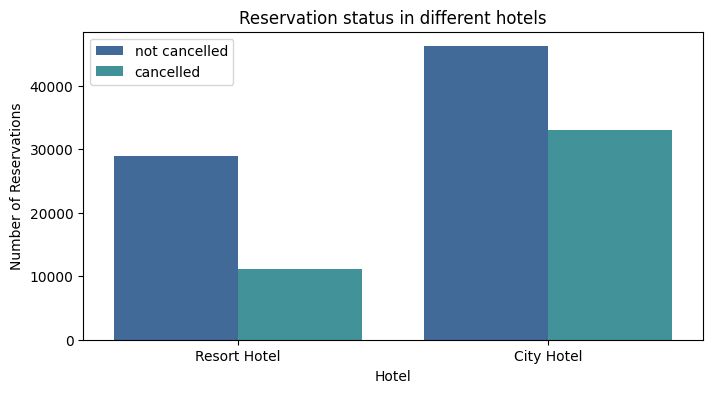

In [33]:
# Analyse and compare the cancellation for each hotel
full_grouped = df.groupby(['hotel'])['is_canceled']
full_grouped.value_counts(normalize = True)

#  Analyse and compare the cancellation for each hotel
plt.figure(figsize = (8,4))
ax1 = sns.countplot(x = 'hotel', hue = 'is_canceled', data = df, palette = [prim, sec])

# Enhance the plot
plt.legend(loc = 'upper left', labels=['not cancelled', 'cancelled'])
plt.title('Reservation status in different hotels')
plt.xlabel('Hotel')
plt.ylabel('Number of Reservations')

# Display the plot
plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [35]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

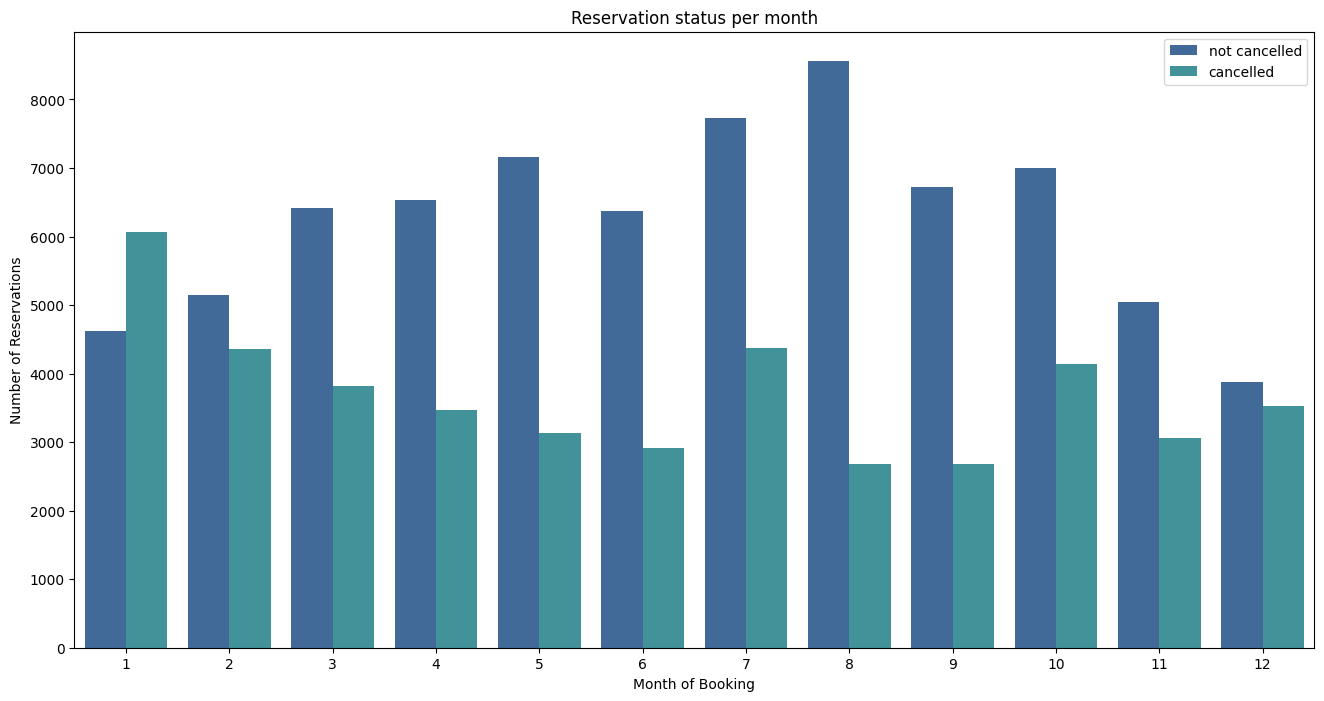

In [36]:
df['reservation_status_month'] = df['reservation_status_date'].dt.month

# Set up the plot
plt.figure(figsize = (16, 8))
ax1 = sns.countplot(x = 'reservation_status_month', hue = 'is_canceled', data = df, palette = [prim, sec])

# Enhance the plot
plt.legend(loc = 'best', labels=['not cancelled', 'cancelled'])
plt.title('Reservation status per month')
plt.xlabel('Month of Booking')
plt.ylabel('Number of Reservations')

# Display the plot
plt.show()

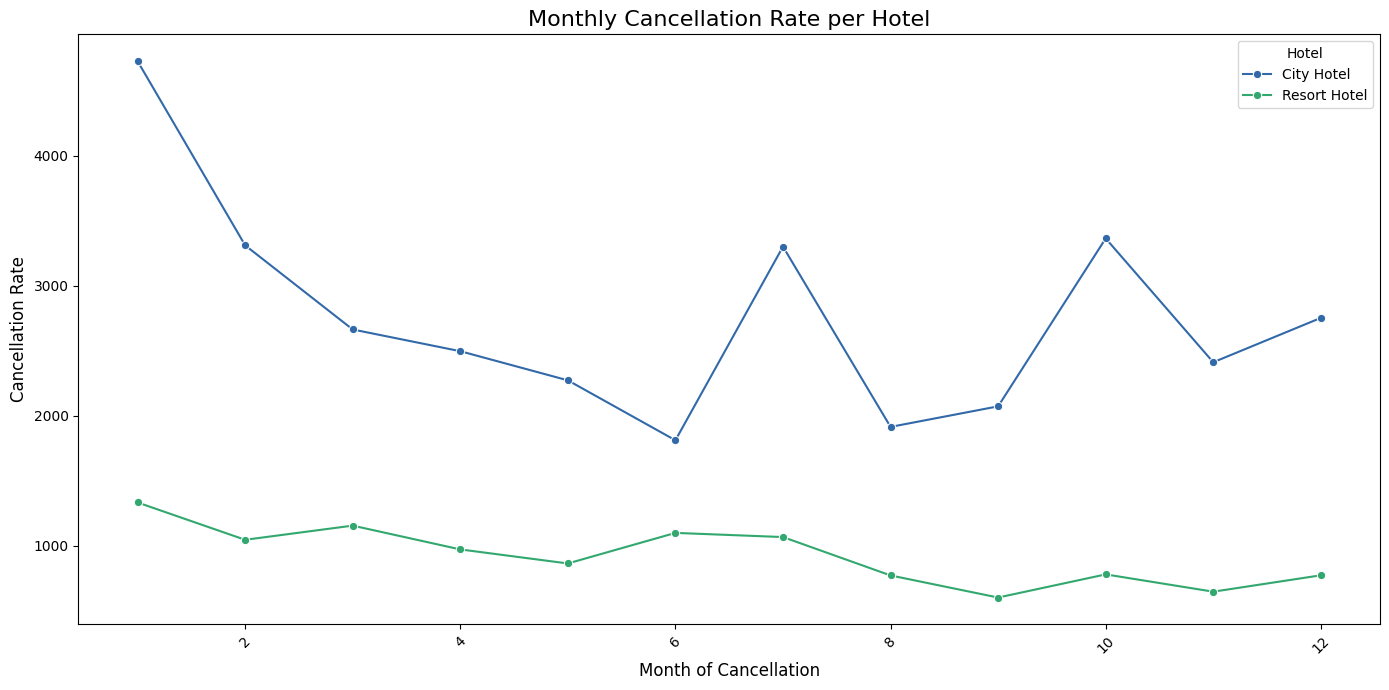

In [37]:
monthly_cancellations = df.groupby(['hotel', 'reservation_status_month'])['is_canceled'].sum().reset_index()

# Set up the plot
plt.figure(figsize=(14, 7))
sns.lineplot(x='reservation_status_month', y='is_canceled', hue='hotel', data=monthly_cancellations, marker='o', palette = [prim, ter])

# Enhance the plot
plt.title('Monthly Cancellation Rate per Hotel', fontsize=16)
plt.xlabel('Month of Cancellation', fontsize=12)
plt.ylabel('Cancellation Rate', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels to make them readable
plt.legend(title='Hotel')

# Display the plot
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_12200\1264620619.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='reservation_status_month', y='adr', data = monthly_adr, palette = dark_blue_palette)


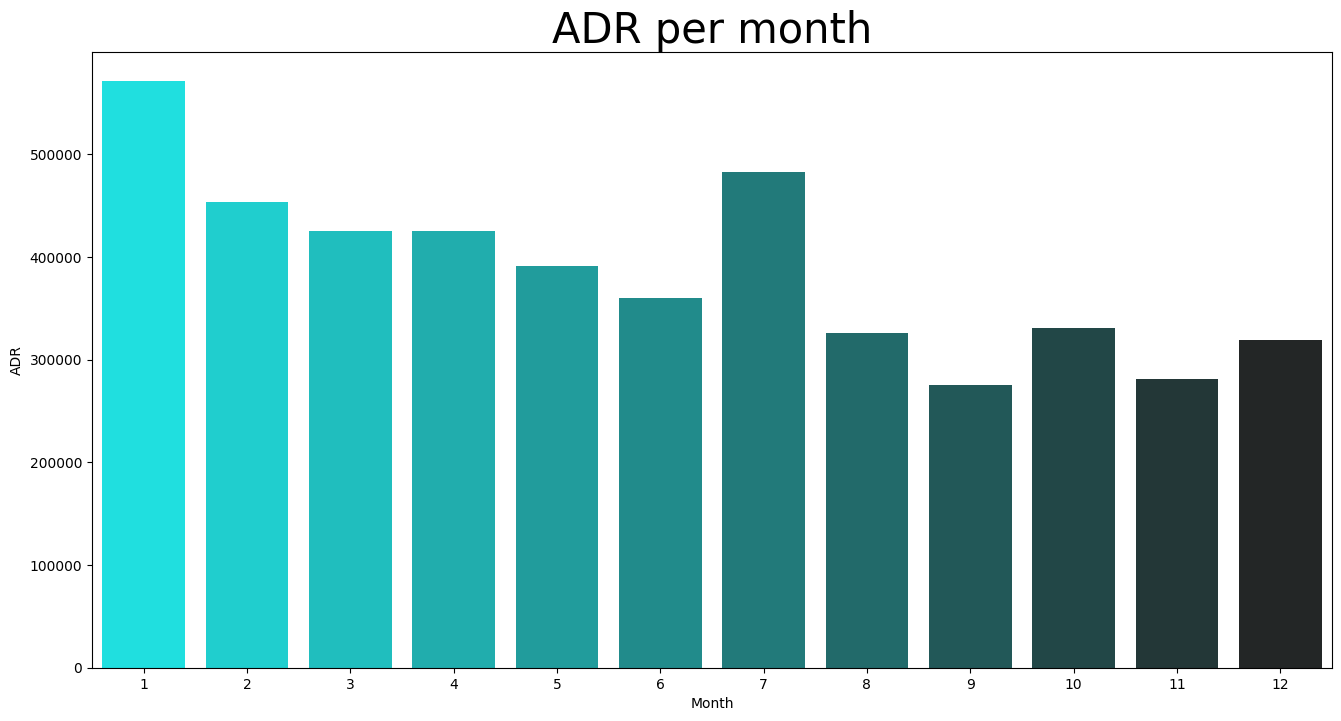

In [38]:
monthly_adr = df[df['is_canceled'] == 1].groupby('reservation_status_month')[['adr']].sum().reset_index()
dark_blue_palette = sns.dark_palette("cyan", reverse=True, n_colors=len(monthly_adr))
# Setup plot
plt.figure(figsize = (16, 8))
sns.barplot(x='reservation_status_month', y='adr', data = monthly_adr, palette = dark_blue_palette)

# Enhance the plot
plt.xlabel('Month')
plt.ylabel('ADR')
plt.title('ADR per month', fontsize = 30)

# Display the plot
plt.show()

In [39]:
df.drop(columns=['country', 'company'], axis="columns", inplace=True)
df.dropna(inplace=True)

print(df.shape)

(103048, 35)


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103048 entries, 3 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           103048 non-null  object        
 1   is_canceled                     103048 non-null  int64         
 2   lead_time                       103048 non-null  int64         
 3   arrival_date_year               103048 non-null  int64         
 4   arrival_date_month              103048 non-null  object        
 5   arrival_date_week_number        103048 non-null  int64         
 6   arrival_date_day_of_month       103048 non-null  int64         
 7   stays_in_weekend_nights         103048 non-null  int64         
 8   stays_in_week_nights            103048 non-null  int64         
 9   adults                          103048 non-null  int64         
 10  children                        103048 non-null  float64     

In [41]:
df.drop(columns =["agent"], inplace=True)

In [42]:
df.drop(['name', 'email', 'phone-number', "reservation_status_date"], axis="columns", inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103048 entries, 3 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           103048 non-null  object 
 1   is_canceled                     103048 non-null  int64  
 2   lead_time                       103048 non-null  int64  
 3   arrival_date_year               103048 non-null  int64  
 4   arrival_date_month              103048 non-null  object 
 5   arrival_date_week_number        103048 non-null  int64  
 6   arrival_date_day_of_month       103048 non-null  int64  
 7   stays_in_weekend_nights         103048 non-null  int64  
 8   stays_in_week_nights            103048 non-null  int64  
 9   adults                          103048 non-null  int64  
 10  children                        103048 non-null  float64
 11  babies                          103048 non-null  int64  
 12  meal                 

In [44]:
categorical_features = df.select_dtypes(include="object").columns.to_list()
print(categorical_features)
print(len(categorical_features))

['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'credit_card']
11


In [45]:
## A closer look at categorical features to check for high cardinality

for col in categorical_features:
    if col == "is_canceled":
        continue  
    else:
        print(df[col].value_counts(normalize=True))
        print(f"The number of unique category are {df[col].unique()}  ->  {df[col].nunique()}")
        print("=" * 150)
        print("\n")

hotel
City Hotel      0.690911
Resort Hotel    0.309089
Name: proportion, dtype: float64
The number of unique category are ['Resort Hotel' 'City Hotel']  ->  2


arrival_date_month
August       0.123049
July         0.112608
May          0.097906
June         0.095160
April        0.094694
October      0.091812
September    0.091579
March        0.079080
February     0.062699
December     0.054644
November     0.052490
January      0.044280
Name: proportion, dtype: float64
The number of unique category are ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']  ->  12


meal
BB           0.754784
HB           0.130357
SC           0.100283
Undefined    0.008064
FB           0.006512
Name: proportion, dtype: float64
The number of unique category are ['BB' 'FB' 'HB' 'SC' 'Undefined']  ->  5


market_segment
Online TA        0.544678
Offline TA/TO    0.231251
Groups           0.151997
Direct           0.064028
Corporate        0.00

# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(6, 2, i+1)
    sns.countplot(x=df[categorical_features[i]], color="lightgreen")
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

#### Check for Multicolinearity

In [46]:
print(df.select_dtypes(include=[np.number]).corr())

                                is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.278285           0.004354   
lead_time                          0.278285   1.000000           0.040647   
arrival_date_year                  0.004354   0.040647           1.000000   
arrival_date_week_number           0.004548   0.120481          -0.530492   
arrival_date_day_of_month         -0.005383  -0.003509           0.005581   
stays_in_weekend_nights           -0.023241   0.048336           0.020734   
stays_in_week_nights               0.004430   0.124940           0.032361   
adults                             0.037872   0.073302           0.061519   
children                           0.005409  -0.049635           0.065417   
babies                            -0.031972  -0.021912          -0.009767   
is_repeated_guest                 -0.029881  -0.055342          -0.022339   
previous_cancellations             0.118150   0.100450          -0.134084   

#### Chi-Square Test of Independence
- The Chi-Square test of independence is a statistical method used to determine if there is a significant association between two categorical variables. It helps to assess whether the distribution of one variable differs significantly across the levels of another variable.


In [47]:
from scipy.stats import chi2_contingency

def chi_square_test(x, y):
    table = pd.crosstab(x, y)
    chi2, p, _, _ = chi2_contingency(table)
    
    return chi2, p

categorical_features.append("is_canceled")
for col in categorical_features:
    if col != "is_canceled":
        chi2, p = chi_square_test(df['is_canceled'], df[col])
        print(f"{col}: chi2={chi2:.2f},  p={p:.4f}")

hotel: chi2=1414.60,  p=0.0000
arrival_date_month: chi2=367.97,  p=0.0000
meal: chi2=293.10,  p=0.0000
market_segment: chi2=5894.51,  p=0.0000
distribution_channel: chi2=1265.62,  p=0.0000
reserved_room_type: chi2=595.72,  p=0.0000
assigned_room_type: chi2=3875.25,  p=0.0000
deposit_type: chi2=22013.72,  p=0.0000
customer_type: chi2=2156.99,  p=0.0000
reservation_status: chi2=103048.00,  p=0.0000
credit_card: chi2=8786.79,  p=0.9440


In [48]:
def chi_square_categorical(df, categorical_features, alpha=0.05):
    """
    Perform Chi-Square test of independence between categorical features.

    Parameters:
        df (pd.DataFrame): The dataset.
        categorical_features (list): List of categorical column names.
        alpha (float): Significance level (default=0.05).

    Returns:
        pd.DataFrame: Results table with chi2, p-value, and decision.
    """
    results = []
    categorical_features = [col for col in categorical_features if col != "is_canceled"]
    for i in range(len(categorical_features)):
        for j in range(i+1, len(categorical_features)):  # avoid duplicates
            col1, col2 = categorical_features[i], categorical_features[j]
            table = pd.crosstab(df[col1], df[col2])
            
            chi2, p, dof, ex = chi2_contingency(table)
            
            decision = "Reject H0 (Dependent)" if p < alpha else "Accept H0 (Independent)" # type: ignore
            
            results.append({
                "Feature_1": col1,
                "Feature_2": col2,
                "Chi2": round(chi2, 3),
                "p_value": round(p, 5),
                "Decision": decision
            })

    return pd.DataFrame(results)

In [49]:
categorical_features = df.select_dtypes(include="object").columns.tolist()

chi_results = chi_square_categorical(df, categorical_features)

print(chi_results)

               Feature_1             Feature_2        Chi2  p_value  \
0                  hotel    arrival_date_month     598.436  0.00000   
1                  hotel                  meal   10750.926  0.00000   
2                  hotel        market_segment    1278.648  0.00000   
3                  hotel  distribution_channel    1250.134  0.00000   
4                  hotel    reserved_room_type   12750.799  0.00000   
5                  hotel    assigned_room_type   16621.392  0.00000   
6                  hotel          deposit_type    3013.920  0.00000   
7                  hotel         customer_type     684.533  0.00000   
8                  hotel    reservation_status    1418.134  0.00000   
9                  hotel           credit_card    9039.689  0.37911   
10    arrival_date_month                  meal    3539.293  0.00000   
11    arrival_date_month        market_segment    5170.682  0.00000   
12    arrival_date_month  distribution_channel    1275.204  0.00000   
13    

In [50]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [51]:
categorical_features

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'credit_card']

In [52]:
X = df.drop(['is_canceled'], axis= 1)
y = df['is_canceled']

In [53]:
df['credit_card'].head()

3    ************5677
4    ************5498
5    ************9263
7    ************8729
8    ************3639
Name: credit_card, dtype: object

In [54]:
X = pd.get_dummies(data= X, columns=['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status'], drop_first= True, dtype= float)

In [55]:
def frequency_encode_column(df, col_name):
    freq_map = df[col_name].value_counts().to_dict()
    df[col_name] = df[col_name].map(freq_map)
    return df

In [56]:
frequency_encode_column(X, 'credit_card')

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show
3,13,2015,27,1,0,1,1,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,14,2015,27,1,0,2,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,14,2015,27,1,0,2,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,9,2015,27,1,0,2,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8,85,2015,27,1,0,3,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,35,30,2,5,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
119386,102,2017,35,31,2,5,3,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
119387,34,2017,35,31,2,5,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
119388,109,2017,35,31,2,5,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [57]:
def add_date_features(df):
    # Keep year
    if "arrival_date_year" in df.columns:
        df["arrival_date_year"] = df["arrival_date_year"].astype(int)

    # Cyclical encoding for week number
    if "arrival_date_week_number" in df.columns:
        week = df["arrival_date_week_number"]

        # Standard sine/cos
        week_sin = np.sin(2 * np.pi * week / 52)
        week_cos = np.cos(2 * np.pi * week / 52)

        # Shift to positive range [0, 1]
        df["week_sin"] = (week_sin + 1) / 2
        df["week_cos"] = (week_cos + 1) / 2

        df.drop(columns=["arrival_date_week_number"], inplace=True)
    
    return df


In [58]:
add_date_features(X)

,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show,week_sin,week_cos
3,13,2015,1,0,1,1,0.0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.439732,0.003646
4,14,2015,1,0,2,2,0.0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.439732,0.003646
5,14,2015,1,0,2,2,0.0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.439732,0.003646
7,9,2015,1,0,2,2,0.0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.439732,0.003646
8,85,2015,1,0,3,2,0.0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.439732,0.003646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,30,2,5,2,0.0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.057272,0.267638
119386,102,2017,31,2,5,3,0.0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.057272,0.267638
119387,34,2017,31,2,5,2,0.0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.057272,0.267638
119388,109,2017,31,2,5,2,0.0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.057272,0.267638


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103048 entries, 3 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           103048 non-null  object 
 1   is_canceled                     103048 non-null  int64  
 2   lead_time                       103048 non-null  int64  
 3   arrival_date_year               103048 non-null  int64  
 4   arrival_date_month              103048 non-null  object 
 5   arrival_date_week_number        103048 non-null  int64  
 6   arrival_date_day_of_month       103048 non-null  int64  
 7   stays_in_weekend_nights         103048 non-null  int64  
 8   stays_in_week_nights            103048 non-null  int64  
 9   adults                          103048 non-null  int64  
 10  children                        103048 non-null  float64
 11  babies                          103048 non-null  int64  
 12  meal                 

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, )

In [77]:
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),   # Standardize features
    ("svm", LinearSVC(C=1.0, max_iter=5000, random_state=42))
])

In [78]:
svm_pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('svm', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001


In [79]:
train_acc = accuracy_score(y_train, svm_pipeline.predict(X_train))
test_acc = accuracy_score(y_test, svm_pipeline.predict(X_test))

In [80]:
print({'train_acc': train_acc, 'test_acc': test_acc})

{'train_acc': 1.0, 'test_acc': 1.0}


In [81]:
knn = KNeighborsClassifier(
    n_neighbors=7,          # Safe middle ground
    weights="distance",     # Closer neighbors matter more
    metric="minkowski",     # Default (Euclidean)
    n_jobs=-1
)

In [82]:
knn.fit(X_train, y_train)

,n_neighbors,7
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,-1


In [83]:
train_acc = accuracy_score(y_train, knn.predict(X_train))
test_acc = accuracy_score(y_test, knn.predict(X_test))

In [84]:
print({'train_acc': train_acc, 'test_acc': test_acc})

{'train_acc': 1.0, 'test_acc': 0.7991751576904416}


In [85]:
rfc = RandomForestClassifier(
    n_estimators=200,       # More trees → stability
    max_depth=15,           # Prevents very deep overfitting trees
    min_samples_split=5,    # Avoids splits on tiny samples
    min_samples_leaf=2,     # Keeps leaves from being too small
    max_features="sqrt",    # Good default for tabular data
    n_jobs=-1,              # Use all cores
    random_state=42
)

In [86]:
rfc.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,15
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [87]:
train_acc = accuracy_score(y_train, rfc.predict(X_train))
test_acc = accuracy_score(y_test, rfc.predict(X_test))

In [88]:
print({'train_acc': train_acc, 'test_acc': test_acc})

{'train_acc': 1.0, 'test_acc': 1.0}
